In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from src import *

# Read Data

In [2]:
predicted_returns = pd.read_pickle("data/pred_ret_Least Correlated 15.pkl")
predicted_returns

predicted_ret
           ticker               
2001-02-28 A           -0.089789
           AAPL        -0.074102
           ABT         -0.033381
           ADBE        -0.056268
           ADI          0.014105
...                          ...
2024-02-29 XYL          0.077408
           YUM          0.000280
           ZBH          0.036020
           ZBRA         0.035131
           ZTS          0.011332

[80783 rows x 1 columns]

In [3]:
price = pd.read_pickle("data/price.pkl")["adj_close"].unstack("ticker")
price = fill_price_dates(price, droplevel=False).ffill()
price.shape

(8822, 392)

# Find top / bottom decile for long / short position

In [4]:
start_date = datetime(2007, 1, 1)
position_indicator = calc_position_by_rank(
    df_price=price, 
    df_ratio=predicted_returns.loc[start_date:].unstack("ticker"),
    rank_formula="predicted_ret",
    lb=0,
    ub=0.1,
    interval=None,
    use_change=False,
)
position_indicator

ticker,A,AAL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,FOXA,DOW,AMCR,LHX,CTVA,TT,CARR,ABNB,UBER,CEG
2007-01-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-02-28,1,-1,0,0,0,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-03-31,0,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
2007-04-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007-05-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,0,-1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-10-31,0,0,0,0,0,0,0,0,1,0,...,0,-1,0,0,-1,0,0,0,0,0
2023-11-30,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-12-31,-1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1


# Example: Position to equal weighted

In [5]:
INIT_CAPITAL = 1e6

In [6]:
df_ff = get_ff_data(use_cache=True).resample("M").ffill()
df_ff.shape

(313, 4)

In [7]:
ratio = calc_ratio(use_cache=True, use_data_cache=True, tickers=None
                   ).dropna(how="all", axis=1)
ratio_col = list(set(ratio_col).intersection(ratio.columns))
ratio.shape

(98574, 69)

In [8]:
from src import portfolio_capm_optimized
import matplotlib.pyplot as plt

In [9]:
trade_cls = CalcTrade(
    df_price=price,
    init_cap=INIT_CAPITAL,
    adj_small_change=True
)

# Run backtest with All Position Change

In [9]:
position = portfolio_capm_optimized(
    df_ratio=ratio, 
    df_price=price,
    df_ff=df_ff,
    estimation_month=36,
    min_weight=0,
    position_size=INIT_CAPITAL,
    position_indicator=position_indicator,
)

Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var601, [[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... -0.00 0.00]
 ...
 [0.00 -0.00 ... 0.00 -0.00]
 [0.00 0.00 ... -0.00 0.04]])
Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var1137, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.02]])
Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var1153, [[0.00 0.00 ... 0.00 0.00]
 [0.00 0.01 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.03 0.00]
 [0.00 0.00 ... 0.00 0.02]])
Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var1689, [[0.00 0.00 ... 0.00 -0.00]
 [0.00 0.02 ... 0.01 0.00]
 ...
 [0.00 0.01 ... 0.05 0.00]
 [-0.00 0.00 ... 0.00 0.01]])
Problem doe

In [10]:
position

ticker,A,AAL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,FOXA,DOW,AMCR,LHX,CTVA,TT,CARR,ABNB,UBER,CEG
2007-01-31,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
2007-02-28,3.210133e-19,-2.011156e+02,0.0,0.0,0.0,-1.460540e+03,0.0,1.966304e-19,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
2007-03-31,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,-1.199977e+04,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
2007-04-30,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
2007-05-31,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,0.000000e+00,-3.671358e-19,0.0,0.0,0.0,9.221672e-20,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
2023-10-31,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,-3.733701e-18,0.0,...,0.0,-1.135738e-19,0.0,0.0,-2261.147994,0.0,0.0,0.0,0.0,0.000000e+00
2023-11-30,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,5.510600e+01,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000e+00
2023-12-31,-6.195197e-20,7.508245e-19,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.000000e+00,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-4.627390e-19


<Axes: >

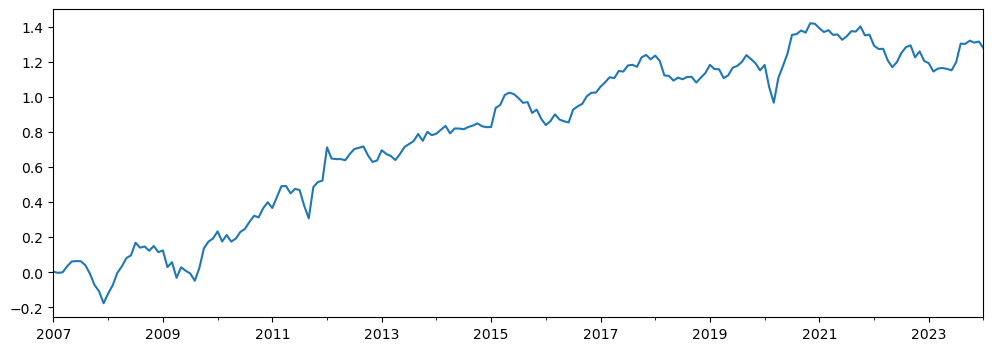

In [16]:
summary_df = trade_cls.iter_dates(position=position)
summary_df["total_ret"].plot(figsize=(12,4))

Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var33089, [[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... -0.00 0.00]
 ...
 [0.00 -0.00 ... 0.00 -0.00]
 [0.00 0.00 ... -0.00 0.04]])
Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var33625, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.02]])
Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var33641, [[0.00 0.00 ... 0.00 0.00]
 [0.00 0.01 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.03 0.00]
 [0.00 0.00 ... 0.00 0.02]])
Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var34177, [[0.00 0.00 ... 0.00 -0.00]
 [0.00 0.02 ... 0.01 0.00]
 ...
 [0.00 0.01 ... 0.05 0.00]
 [-0.00 0.00 ... 0.00 0.01]])
Proble

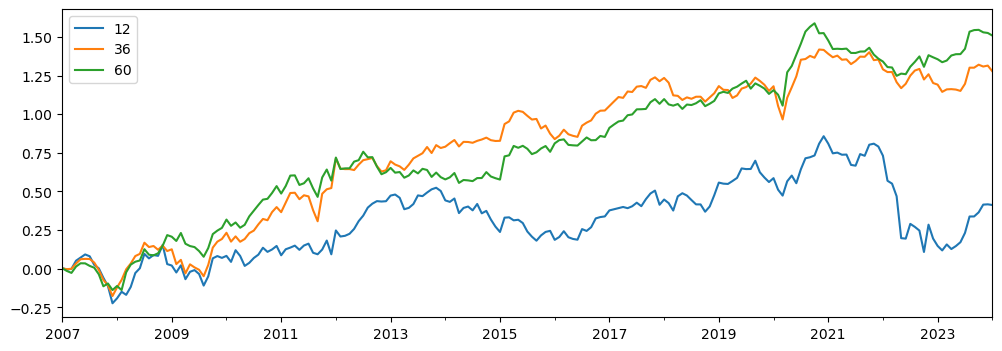

In [17]:
results = {}
all_position = {}
for lookback in [12, 36, 60]:
    position = portfolio_capm_optimized(
        df_ratio=ratio, 
        df_price=price,
        df_ff=df_ff,
        estimation_month=lookback,
        position_size=INIT_CAPITAL,
        position_indicator=position_indicator,
    )
    all_position[lookback] = position

    summary_df = trade_cls.iter_dates(position=position)
    summary_df["total_ret"].rename(lookback).plot(figsize=(12,4))
    plt.legend()
    
    results[lookback] = pd.Series({
        **eval_return(summary_df["total_ret"], df_ff=df_ff, ann_factor=12),
        **ff_decomposition(summary_df["total_ret"], df_ff=df_ff, ann_factor=12)
    }) 

In [18]:
pd.DataFrame(results).T

,return,mean,std,skew,kurtosis,sharpe,sharpe_mkt,sortino,var,cvar,max_drawdown,downside_beta,alpha,beta_Mkt-RF,beta_SMB,beta_HML,beta_RF
12,0.412547,0.001999,0.053592,-0.623649,3.451776,0.106500,0.234891,0.141140,-0.278078,-0.422937,-0.572872,0.083610,4.109640,0.425900,-3.779351,-11.565805,-1216.175961
36,1.277282,0.006248,0.044318,0.515619,2.383012,0.460417,0.381696,0.774104,-0.226699,-0.286401,-0.257965,0.053739,9.431307,1.574343,-2.050024,-21.522724,-209.979572
60,1.508532,0.007380,0.042226,0.971423,3.260588,0.576325,0.436623,1.144025,-0.208484,-0.235530,-0.294850,0.101551,9.071521,1.499774,-2.129836,-24.438377,640.593026


In [10]:
position

ticker,A,AAL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,FOXA,DOW,AMCR,LHX,CTVA,TT,CARR,ABNB,UBER,CEG
2007-01-31,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2007-02-28,-975.371539,-304.505985,0.0,0.0,0.0,-1623.810746,0.0,-909.829718,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2007-03-31,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,-2185.759973,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2007-04-30,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2007-05-31,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,0.000000,9889.867905,0.0,0.0,0.0,-1087.828624,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2023-10-31,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,4082.699859,0.0,...,0.0,-2721.48362,0.0,0.0,7223.447464,0.0,0.0,0.0,0.0,0.000000
2023-11-30,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,270.237546,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2023-12-31,370.188570,-8822.916996,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3456.493397


In [13]:
(position * price.loc[position.index, position.columns]).clip(-np.inf, 0).sum(axis=1)

2007-01-31   -1000000.0
2007-02-28   -1000000.0
2007-03-31   -1000000.0
2007-04-30   -1000000.0
2007-05-31   -1000000.0
                ...    
2023-09-30   -1000000.0
2023-10-31   -1000000.0
2023-11-30   -1000000.0
2023-12-31   -1000000.0
2024-01-31          0.0
Length: 205, dtype: float64

<Axes: >

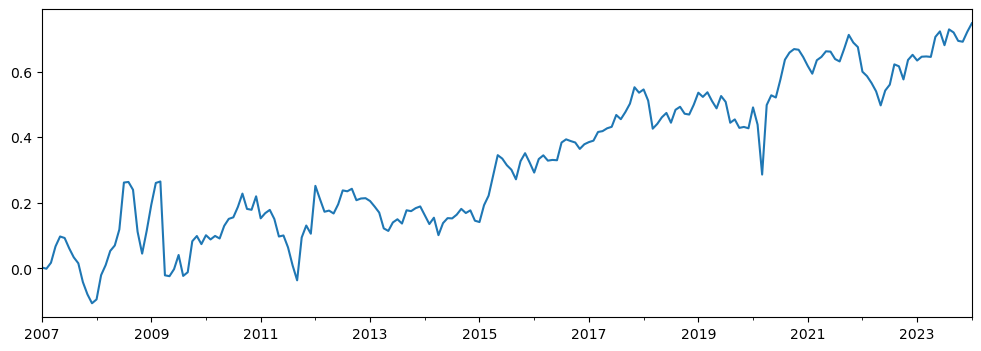

In [19]:
position_eq = portfolio_equal_weighted(
    position_indicator=position_indicator,
    df_price=price,
    position_size=INIT_CAPITAL,    
)
summary_df = trade_cls.iter_dates(position=position_eq)
summary_df["total_ret"].plot(figsize=(12,4))

Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var8004, [[0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... -0.00 0.00]
 ...
 [0.00 -0.00 ... 0.00 -0.00]
 [0.00 0.00 ... -0.00 0.04]])
Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var8366, [[0.02 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.00 0.00]
 [0.00 0.00 ... 0.00 0.02]])
Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var8377, [[0.00 0.00 ... 0.00 0.00]
 [0.00 0.01 ... 0.00 0.00]
 ...
 [0.00 0.00 ... 0.03 0.00]
 [0.00 0.00 ... 0.00 0.02]])
Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
QuadForm(var8739, [[0.00 0.00 ... 0.00 -0.00]
 [0.00 0.02 ... 0.01 0.00]
 ...
 [0.00 0.01 ... 0.05 0.00]
 [-0.00 0.00 ... 0.00 0.01]])
Problem do

<Axes: >

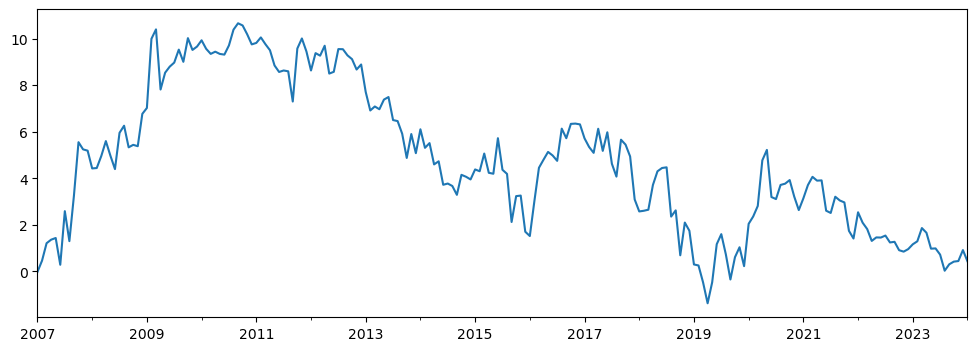

In [11]:
position_mk = portfolio_markovitz_optimized(
    df_ratio=ratio, 
    df_price=price,
    estimation_month=36,
    position_size=INIT_CAPITAL,
    position_indicator=position_indicator,  
    optimize_kwargs={"lambda_": 0.5, "positive_weight": False}
)
summary_df = trade_cls.iter_dates(position=position_mk)
summary_df["total_ret"].plot(figsize=(12,4))

In [16]:
eval_return(summary_df["total_ret"], df_ff=df_ff)

{'return': 2.2542209230632295,
 'mean': 0.011035071226380597,
 'std': 0.14143780901685465,
 'skew': 1.0968219908556218,
 'kurtosis': 5.766374704404646,
 'sharpe': 1.2366471265658103,
 'sharpe_mkt': 1.259135412805603,
 'sortino': 2.0842677924931188,
 'var': -2.778161332778598,
 'cvar': -4.282496183811283,
 'max_drawdown': -0.836907309801284,
 'downside_beta': -0.04521214836646179}